In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os

In [2]:
from keras.utils import HDF5Matrix

x_test = HDF5Matrix('hdf5/data.h5', 'x_test')

/cluster/home/rohrbjan/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.losses import binary_crossentropy
import keras.backend as K


def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [5]:
from keras.models import load_model
model = load_model("checkpoints/checkpointsweights_epoch_173-0.0100-0.9928-0.9989-0.0227-0.9864-0.9980.hdf5", 
                   custom_objects={'bce_dice_loss': bce_dice_loss, 
                                  'dice_coeff': dice_coeff})

In [6]:
import h5py
hdf5_file = h5py.File("hdf5/preds.h5", mode='w')

In [7]:
hdf5_file.create_dataset("preds173", (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1), np.bool_)

<HDF5 dataset "preds173": shape (60697, 512, 512, 1), type "|b1">

In [8]:
threshold = 0.5
for i in range(x_test.shape[0]):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Preds: {}/{}'.format(i, x_test.shape[0]))
    mask = model.predict(x_test[i].reshape(1, 512, 512, 3)) >= threshold
    # save the image
    hdf5_file["preds173"][i, ...] = mask

Preds: 1000/60697
Preds: 2000/60697
Preds: 3000/60697
Preds: 4000/60697
Preds: 5000/60697
Preds: 6000/60697
Preds: 7000/60697
Preds: 8000/60697
Preds: 9000/60697
Preds: 10000/60697
Preds: 11000/60697
Preds: 12000/60697
Preds: 13000/60697
Preds: 14000/60697
Preds: 15000/60697
Preds: 16000/60697
Preds: 17000/60697
Preds: 18000/60697
Preds: 19000/60697
Preds: 20000/60697
Preds: 21000/60697
Preds: 22000/60697
Preds: 23000/60697
Preds: 24000/60697
Preds: 25000/60697
Preds: 26000/60697
Preds: 27000/60697
Preds: 28000/60697
Preds: 29000/60697
Preds: 30000/60697
Preds: 31000/60697
Preds: 32000/60697
Preds: 33000/60697
Preds: 34000/60697
Preds: 35000/60697
Preds: 36000/60697
Preds: 37000/60697
Preds: 38000/60697
Preds: 39000/60697
Preds: 40000/60697
Preds: 41000/60697
Preds: 42000/60697
Preds: 43000/60697
Preds: 44000/60697
Preds: 45000/60697
Preds: 46000/60697
Preds: 47000/60697
Preds: 48000/60697
Preds: 49000/60697
Preds: 50000/60697
Preds: 51000/60697
Preds: 52000/60697
Preds: 53000/60697
Pr

In [9]:
hdf5_file.close()

In [1]:
from keras.utils import HDF5Matrix
preds = HDF5Matrix('hdf5/preds.h5', 'preds173')

/cluster/home/rohrbjan/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
preds[0]

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])

In [11]:
def crop_center(img,cropx = 300, cropy = 300):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [12]:
preds_crop = np.array([crop_center(x.squeeze()) for x in preds])

In [13]:
from scipy.ndimage.morphology import binary_fill_holes

In [14]:
#preds_holes_filled = []
#
#for i in range(x_test.shape[0]):
#    # print how many images are saved every 1000 images
#    if i % 1000 == 0 and i > 1:
#        print('Preds: {}/{}'.format(i, x_test.shape[0]))
#    preds_holes_filled.append(binary_fill_holes(preds_crop[i]))

In [15]:
from scipy.ndimage.morphology import binary_erosion

In [16]:
#preds_eroded = []
#
#for i in range(x_test.shape[0]):
#    # print how many images are saved every 1000 images
#    if i % 1000 == 0 and i > 1:
#        print('Preds: {}/{}'.format(i, x_test.shape[0]))
#    preds_eroded.append(binary_erosion(preds_crop[i]))

In [17]:
#preds_holes_filled[0]

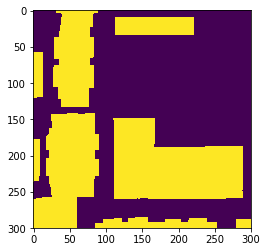

In [18]:
plt.imshow(preds_crop[0])

In [19]:
#plt.imshow(preds_eroded[0])

In [20]:
# test preds anschauen

In [21]:
idx_tmp = np.random.randint(low = 0, high=x_test.shape[0])
pred_tmp = model.predict(x_test[idx_tmp].reshape(1, 512, 512, 3))

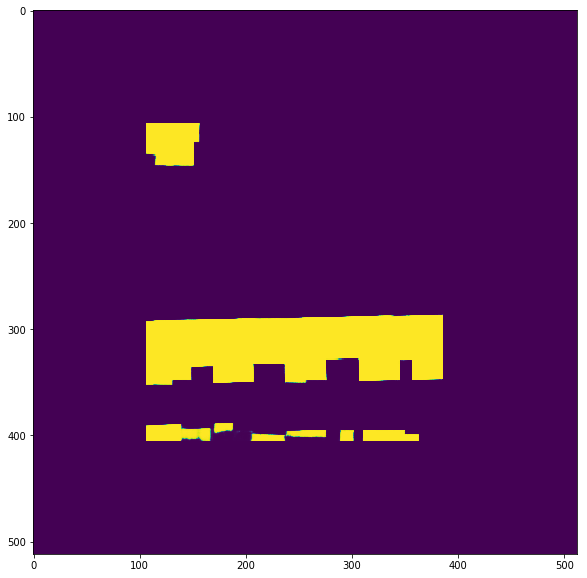

In [22]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(pred_tmp.squeeze())

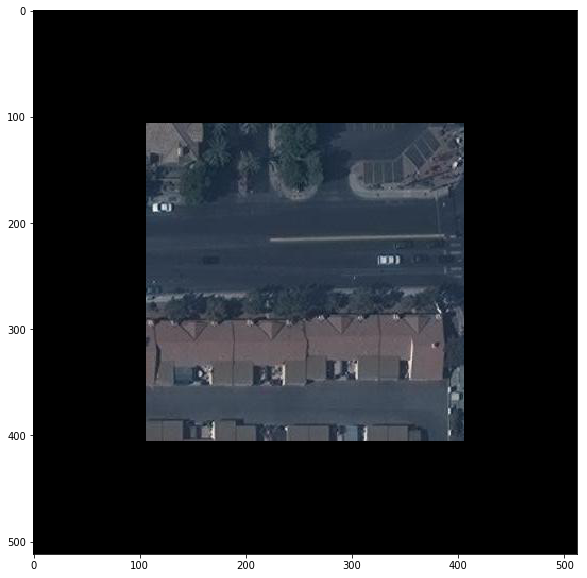

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(x_test[idx_tmp].squeeze())

In [24]:
from scipy.ndimage import label
pred_labeled = [label(x) for x in preds_crop]

In [25]:
def bbox(mask):
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]

    return [float(xmin), float(ymin), float(xmax - xmin), float(ymax-ymin)]

In [26]:
def single_annotation(image_id, single_mask):
    _result = {}
    _result["image_id"] = image_id
    _result["category_id"] = 100 # as 100 is the category_id of Building
    
    _result["score"] = 1.0 #float(np.mean(preds_crop[image_id, single_mask])) # a score between 0 and 1
    
    _mask = cocomask.encode(np.asfortranarray(single_mask.astype("uint8")))
    _mask["counts"] = _mask["counts"].decode("UTF-8")
    
    _result["segmentation"] = _mask
    
    _result["bbox"] = bbox(single_mask)
    return _result

In [27]:
pred_ann = []

for i in range(x_test.shape[0]):
    for m in range(pred_labeled[i][1]):
        if np.sum(pred_labeled[i][0] == m + 1) < 25:
            continue
        else:
            pred_ann.append(single_annotation(i, pred_labeled[i][0] == m + 1))
        
    print("Progress {:2.1%}".format((i + 1) / x_test.shape[0]), end="\r")

In [28]:
import json
fp = open("predictions173.json", "w")
fp.write(json.dumps(pred_ann))
fp.close()

In [ ]:
#!pip install crowdai --user --upgrade

In [ ]:
#! pip install Jinja==2.10 --user

In [ ]:
# Submission auf mac oder linux machen, läuft hier nicht

In [ ]:
#import crowdai
#api_key = "aacaf24c9d0881f4d7508a670ae5289f"
#
#challenge = crowdai.Challenge("crowdAIMappingChallenge", api_key)
#result = challenge.submit("predictions.json")
#print(result)